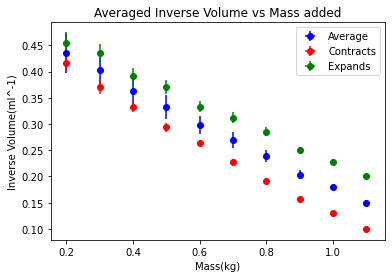

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import scipy

fname = 'AveragedData.csv'

data = np.loadtxt(fname, delimiter=',', comments='#',
                  usecols=(0, 1, 2, 3))

x = data[:, 0]
y = data[:, 2]
avg_x_sigma = data[:, 1]
avg_y_sigma = data[:, 3]

plt.errorbar(x, y, avg_y_sigma, avg_x_sigma, "bo")

fname = 'GasContractsData.csv'

data = np.loadtxt(fname, delimiter=',', comments='#',
                  usecols=(1, 2, 6, 7))

x = data[:, 0]
y = data[:, 2]
con_x_sigma = data[:, 1]
con_y_sigma = data[:, 3]

plt.errorbar(x, y, yerr=con_y_sigma, xerr=con_x_sigma, fmt='ro')

fname = 'GasExpandsData.csv'

data = np.loadtxt(fname, delimiter=',', comments='#',
                  usecols=(1, 2, 6, 7))

x = data[:, 0]
y = data[:, 2]
ex_x_sigma = data[:, 1]
ex_y_sigma = data[:, 3]

plt.errorbar(x, y, yerr=ex_y_sigma, xerr=ex_x_sigma, fmt='go')

plt.title("Averaged Inverse Volume vs Mass added")
plt.legend(["Average", "Contracts", "Expands"])
plt.xlabel("Mass(kg)")
plt.ylabel("Inverse Volume(ml^-1)")

plt.show()

In [38]:
from scipy.optimize import curve_fit

def lin_fit(x, k, b):
    return -k*x+b

guesses = (-.320,.500)


fit_params, fit_cov = curve_fit(lin_fit, x, y, sigma=avg_y_sigma, p0=guesses,
                                maxfev=10**5)

# read out parameter results
param_names = ['slope', '1/v0']

fit_params_error = np.sqrt(np.diag(fit_cov))

print("Fit parameters:")
for i in range(len(fit_params)):
    print('{} = {:.3e} +/- {:.3e}'.format(param_names[i],
                                          fit_params[i],
                                          fit_params_error[i]))


# function that  calculates the chi square value of a fit
def chi_square(fit_parameters, x, y, sigma):
    #
    return np.sum((y-lin_fit(x, *fit_parameters))**2/sigma**2)


# calculate and print chi square as well as the per degree-of-freedom value
chi2 = chi_square(fit_params, x, y, avg_y_sigma)
dof = len(x) - len(fit_params)
print("\nGoodness of fit - chi square measure:")
print("Chi2 = {}, Chi2/dof = {}\n".format(chi2, chi2/dof))

Fit parameters:
slope = 2.796e-01 +/- 5.074e-03
1/v0 = 5.067e-01 +/- 4.936e-03

Goodness of fit - chi square measure:
Chi2 = 0.7066533676354002, Chi2/dof = 0.08833167095442503



In [67]:
n = 8.065E-5
g = 9.81
A = 1.7544E-4
T = 295.15

print(fit_params)
print(fit_params_error)

pct_u_k = (fit_params_error[0]/fit_params[0])

R_in_mL = g/(fit_params[0]*n*A*T)
uR_ml = R_in_mL * g * fit_params_error[0] / (A*n*T*fit_params[0])

print("R in mL: ", R_in_mL, "+-", uR_ml)
print("R in ml percent u: {:0.2f}%".format((uR_ml/R_in_mL)))

uR_ml = R_in_mL * g * fit_params_error[0] / (A*n*T*fit_params[0])

R_in_m3 = R_in_mL*1E-06
uR_in_m3 = R_in_m3 * g * fit_params_error[0] / (A*n*T*fit_params[0])
print(uR_in_m3)
print("R in m^3: ", R_in_m3)
print(fit_params_error)


[0.27961849 0.50668595]
[0.00507434 0.00493604]
R in mL:  8400929.651802372 +- 358124714552.3772
R in ml percent u: 42629.18%
358124.7145523772
R in m^3:  8.400929651802372
[0.00507434 0.00493604]
